<a href="https://colab.research.google.com/github/ricardoandreom/Football-Data-Analysis/blob/main/API_football_data_org.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from scipy import stats
import math
#!pip install mplsoccer
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [62]:
import requests
import json

url = "http://api.football-data.org/v2/competitions/"

headers = {'X-Auth-Token': "YOUR PASS"}

response = requests.request("GET", url, headers=headers)

dados = json.loads(response.text)

from pandas import json_normalize

df_dados = json_normalize(dados["competitions"])
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              165 non-null    int64  
 1   name                            165 non-null    object 
 2   code                            83 non-null     object 
 3   emblemUrl                       28 non-null     object 
 4   plan                            165 non-null    object 
 5   numberOfAvailableSeasons        165 non-null    int64  
 6   lastUpdated                     165 non-null    object 
 7   area.id                         165 non-null    int64  
 8   area.name                       165 non-null    object 
 9   area.countryCode                165 non-null    object 
 10  area.ensignUrl                  127 non-null    object 
 11  currentSeason.id                164 non-null    float64
 12  currentSeason.startDate         164 

In [63]:
pais_pt = ["Portugal"]

In [64]:
descarga_dadospt = df_dados[df_dados["area.name"].isin(pais_pt)]

descarga_dadospt
# Primeira liga id: 2017

,id,name,code,emblemUrl,plan,numberOfAvailableSeasons,lastUpdated,area.id,area.name,area.countryCode,...,currentSeason.startDate,currentSeason.endDate,currentSeason.currentMatchday,currentSeason.winner,currentSeason.winner.id,currentSeason.winner.name,currentSeason.winner.shortName,currentSeason.winner.tla,currentSeason.winner.crestUrl,currentSeason
116,2098,Taça de Portugal,None,None,TIER_FOUR,4,2021-04-17T11:28:59Z,2187,Portugal,PRT,...,2020-09-27,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,2096,Liga2 Cabovisão,None,None,TIER_FOUR,4,2021-04-17T11:29:03Z,2187,Portugal,PRT,...,2020-09-13,2021-05-19,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2017,Primeira Liga,PPL,https://crests.football-data.org/PPL.png,TIER_ONE,74,2022-03-20T09:34:09Z,2187,Portugal,PRT,...,2022-08-07,2023-05-28,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2097,Supertaça Cândido de Oliveira,None,None,TIER_FOUR,4,2019-08-05T22:35:11Z,2187,Portugal,PRT,...,2020-12-23,2020-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import requests
import json

url = "http://api.football-data.org/v2/competitions/2017/matches"

headers = {'X-Auth-Token': "YOUR PASS"}

response = requests.request("GET", url, headers=headers)

response.text

In [ ]:
json.loads(response.text)

In [94]:
dados_obtidos = json.loads(response.text)

In [95]:
from pandas import json_normalize

df_dadosObtidos = json_normalize(dados_obtidos["matches"])
df_dadosObtidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        306 non-null    int64  
 1   utcDate                   306 non-null    object 
 2   status                    306 non-null    object 
 3   matchday                  306 non-null    int64  
 4   stage                     306 non-null    object 
 5   group                     0 non-null      object 
 6   lastUpdated               306 non-null    object 
 7   referees                  306 non-null    object 
 8   season.id                 306 non-null    int64  
 9   season.startDate          306 non-null    object 
 10  season.endDate            306 non-null    object 
 11  season.currentMatchday    306 non-null    int64  
 12  odds.msg                  306 non-null    object 
 13  score.winner              63 non-null     object 
 14  score.dura

In [96]:
df_dadosObtidos = df_dadosObtidos.drop(["referees","score.penalties.awayTeam","score.penalties.homeTeam","score.extraTime.awayTeam","score.extraTime.homeTeam"\
                                        ,"season.endDate","season.startDate","utcDate","group","lastUpdated","odds.msg","stage"], axis=1)

In [97]:
df_dadosObtidos = df_dadosObtidos.fillna(0)
df_dadosObtidos.info()
df_dadosObtidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       306 non-null    int64  
 1   status                   306 non-null    object 
 2   matchday                 306 non-null    int64  
 3   season.id                306 non-null    int64  
 4   season.currentMatchday   306 non-null    int64  
 5   score.winner             306 non-null    object 
 6   score.duration           306 non-null    object 
 7   score.fullTime.homeTeam  306 non-null    float64
 8   score.fullTime.awayTeam  306 non-null    float64
 9   score.halfTime.homeTeam  306 non-null    float64
 10  score.halfTime.awayTeam  306 non-null    float64
 11  homeTeam.id              306 non-null    int64  
 12  homeTeam.name            306 non-null    object 
 13  awayTeam.id              306 non-null    int64  
 14  awayTeam.name            3

,id,status,matchday,season.id,season.currentMatchday,score.winner,score.duration,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,homeTeam.name,awayTeam.id,awayTeam.name
0,422973,FINISHED,1,1518,8,HOME_TEAM,REGULAR,4.0,0.0,3.0,0.0,1903,Sport Lisboa e Benfica,712,FC Arouca
1,422974,FINISHED,1,1518,8,AWAY_TEAM,REGULAR,0.0,1.0,0.0,0.0,496,Rio Ave FC,5589,FC Vizela
2,422976,FINISHED,1,1518,8,HOME_TEAM,REGULAR,2.0,0.0,2.0,0.0,582,GD Estoril Praia,5531,FC Famalicão
3,422972,FINISHED,1,1518,8,HOME_TEAM,REGULAR,5.0,1.0,3.0,0.0,503,FC Porto,5575,CS Marítimo
4,422979,FINISHED,1,1518,8,DRAW,REGULAR,0.0,0.0,0.0,0.0,5530,CD Santa Clara,6618,Casa Pia AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,422679,SCHEDULED,34,1518,8,0,REGULAR,0.0,0.0,0.0,0.0,5533,Gil Vicente FC,6618,Casa Pia AC
302,422680,SCHEDULED,34,1518,8,0,REGULAR,0.0,0.0,0.0,0.0,496,Rio Ave FC,5531,FC Famalicão
303,422681,SCHEDULED,34,1518,8,0,REGULAR,0.0,0.0,0.0,0.0,5601,Portimonense SC,712,FC Arouca
304,422682,SCHEDULED,34,1518,8,0,REGULAR,0.0,0.0,0.0,0.0,5613,Sporting Clube de Braga,507,FC Paços de Ferreira


In [98]:
# Nº advantages kept home
vant_home = df_dadosObtidos[(df_dadosObtidos["score.winner"]=="HOME_TEAM") & (df_dadosObtidos["score.halfTime.homeTeam"]-df_dadosObtidos["score.halfTime.awayTeam"]> 0)].groupby("homeTeam.name")[["id"]].count().reset_index()
vant_home = vant_home.rename(columns={"homeTeam.name":"Team","id":"Nº advantages kept after half-time at home"}).sort_values(["Nº advantages kept after half-time at home"], ascending = False)
vant_home

,Team,Nº advantages kept after half-time at home
3,FC Porto,3
7,Sport Lisboa e Benfica,3
9,Sporting Clube de Portugal,2
0,Boavista FC,1
1,FC Arouca,1
2,FC Famalicão,1
4,GD Estoril Praia,1
5,Portimonense SC,1
6,Rio Ave FC,1
8,Sporting Clube de Braga,1


In [99]:
# Nº advantages kept away
vant_away = df_dadosObtidos[(df_dadosObtidos["score.winner"]=="AWAY_TEAM") & (df_dadosObtidos["score.halfTime.awayTeam"]-df_dadosObtidos["score.halfTime.homeTeam"]> 0)].groupby("awayTeam.name")[["id"]].count().reset_index()
vant_away = vant_away.rename(columns={"awayTeam.name":"Team","id":"Nº advantages kept after half-time away"}).sort_values(["Nº advantages kept after half-time away"], ascending = False)
vant_away

,Team,Nº advantages kept after half-time away
6,Sporting Clube de Braga,3
3,GD Estoril Praia,2
4,Portimonense SC,2
0,Boavista FC,1
1,Casa Pia AC,1
2,FC Porto,1
5,Sport Lisboa e Benfica,1
7,Sporting Clube de Portugal,1
8,Vitória SC,1


In [100]:
# Nº matches winning on half-time at home 
njvinthome = df_dadosObtidos[df_dadosObtidos["score.halfTime.homeTeam"]-df_dadosObtidos["score.halfTime.awayTeam"]> 0].groupby("homeTeam.name")[["id"]].count().reset_index()
njvinthome = njvinthome.rename(columns={"homeTeam.name":"Team","id":"Nº matches winning on half-time at home"}).sort_values(["Nº matches winning on half-time at home"], ascending = False)
njvinthome

,Team,Nº matches winning on half-time at home
6,FC Porto,3
8,GD Estoril Praia,3
11,Sport Lisboa e Benfica,3
2,CS Marítimo,2
3,FC Arouca,2
13,Sporting Clube de Portugal,2
0,Boavista FC,1
1,CD Santa Clara,1
4,FC Famalicão,1
5,FC Paços de Ferreira,1


In [101]:
# Nº matches winning on half-time away
njvintaway = df_dadosObtidos[df_dadosObtidos["score.halfTime.awayTeam"]-df_dadosObtidos["score.halfTime.homeTeam"]> 0].groupby("awayTeam.name")[["id"]].count().reset_index()
njvintaway = njvintaway.rename(columns={"awayTeam.name":"Team","id":"Nº matches winning on half-time away"}).sort_values(["Nº matches winning on half-time away"], ascending = False)
njvintaway

,Team,Nº matches winning on half-time away
10,Sporting Clube de Braga,3
6,GD Estoril Praia,2
7,Portimonense SC,2
0,Boavista FC,1
1,CD Santa Clara,1
2,CS Marítimo,1
3,Casa Pia AC,1
4,FC Porto,1
5,FC Vizela,1
8,Rio Ave FC,1


In [102]:
# Nº matches losing on half-time away
njpintaway = df_dadosObtidos[df_dadosObtidos["score.halfTime.homeTeam"]-df_dadosObtidos["score.halfTime.awayTeam"]> 0].groupby("awayTeam.name")[["id"]].count().reset_index()
njpintaway = njpintaway.rename(columns={"awayTeam.name":"Team","id":"Nº matches losing on half-time away"}).sort_values(["Nº matches losing on half-time away"], ascending = False)
njpintaway

,Team,Nº matches losing on half-time away
1,CS Marítimo,3
7,GD Chaves,3
11,Rio Ave FC,3
5,FC Paços de Ferreira,2
6,FC Porto,2
9,Gil Vicente FC,2
12,Sporting Clube de Portugal,2
0,CD Santa Clara,1
2,Casa Pia AC,1
3,FC Arouca,1


In [103]:
# Nº matches losing on half-time at home
njpinthome = df_dadosObtidos[df_dadosObtidos["score.halfTime.awayTeam"]-df_dadosObtidos["score.halfTime.homeTeam"]> 0].groupby("homeTeam.name")[["id"]].count().reset_index()
njpinthome = njpinthome.rename(columns={"homeTeam.name":"Team","id":"Nº matches losing on half-time at home"}).sort_values(["Nº matches losing on half-time at home"], ascending = False)
njpinthome

,Team,Nº matches losing on half-time at home
0,Boavista FC,2
5,FC Paços de Ferreira,2
9,Gil Vicente FC,2
1,CD Santa Clara,1
2,CS Marítimo,1
3,FC Arouca,1
4,FC Famalicão,1
6,FC Vizela,1
7,GD Chaves,1
8,GD Estoril Praia,1


In [104]:
# Nº turned results at home
vir_home = df_dadosObtidos[((df_dadosObtidos["score.winner"]=="HOME_TEAM") & (df_dadosObtidos["score.halfTime.awayTeam"]-df_dadosObtidos["score.halfTime.homeTeam"]>0))].groupby("homeTeam.name").count()[["id"]].reset_index()
vir_home = vir_home.rename(columns={"homeTeam.name":"Team","id":"Nº turned results after half-time at home"}).sort_values(["Nº turned results after half-time at home"], ascending=False)
vir_home

,Team,Nº turned results after half-time at home
0,Boavista FC,1
1,CD Santa Clara,1
2,Sport Lisboa e Benfica,1


In [105]:
# Nº turned results away
vir_away = df_dadosObtidos[((df_dadosObtidos["score.winner"]=="AWAY_TEAM") & (df_dadosObtidos["score.halfTime.homeTeam"]-df_dadosObtidos["score.halfTime.awayTeam"]> 0))].groupby("awayTeam.name").count()[["id"]].reset_index()
vir_away = vir_away.rename(columns={"awayTeam.name":"Team","id":"Nº turned results after half-time away"}).sort_values(["Nº turned results after half-time away"], ascending=False)
vir_away

,Team,Nº turned results after half-time away
0,Casa Pia AC,1
1,GD Chaves,1
2,Gil Vicente FC,1


In [127]:
import pandas as pd

df1 = pd.merge(vir_home,vir_away,on="Team",how="outer")
df1 = df1.fillna(0)
df1["Nº turned results after half-time"] = df1["Nº turned results after half-time away"]+df1["Nº turned results after half-time at home"]
df2 = pd.merge(df1,njpintaway ,on = "Team",how = "outer")
df2 = df2.fillna(0)
df3 = pd.merge(df2,njpinthome ,on = "Team",how = "outer")
df3 = df3.fillna(0) 
df4 = pd.merge(df3,njvinthome ,on = "Team",how = "outer")
df4 = df4.fillna(0)
df5 = pd.merge(df4,njvintaway ,on = "Team",how = "outer")
df5 = df5.fillna(0)
df6 = pd.merge(df5,vant_away,on = "Team",how = "outer")
df6 = df6.fillna(0)
df7 = pd.merge(df6,vant_home ,on = "Team",how = "outer")
df7 = df7.fillna(0)

df7["Team"] = df7["Team"].astype(str)
df7["Nº turned results after half-time at home"] = df7["Nº turned results after half-time at home"].astype(int)
df7["Nº turned results after half-time away"] = df7["Nº turned results after half-time away"].astype(int)
df7["Nº turned results after half-time"] = df7["Nº turned results after half-time"].astype(int)
df7["Nº matches losing on half-time away"] = df7["Nº matches losing on half-time away"].astype(int)
df7["Nº matches losing on half-time at home"] = df7["Nº matches losing on half-time at home"].astype(int)
df7["Nº matches winning on half-time at home"] = df7["Nº matches winning on half-time at home"].astype(int)
df7["Nº matches winning on half-time away"] = df7["Nº matches winning on half-time away"].astype(int)
df7["Nº advantages kept after half-time at home"] = df7["Nº advantages kept after half-time at home"].astype(int)
df7["Nº advantages kept after half-time away"] = df7["Nº advantages kept after half-time away"].astype(int)
df7["Nº advantages kept after half-time"] = df7["Nº advantages kept after half-time away"]+df7["Nº advantages kept after half-time at home"]


In [128]:
df7["Nº advantages kept after half-time"] = (df7["Nº advantages kept after half-time at home"]+df7["Nº advantages kept after half-time away"]).astype(int).fillna(0)
df7["% advantages kept after half-time away"] = (((df7["Nº advantages kept after half-time away"]*100)/df7["Nº matches winning on half-time away"]).fillna(0)).round(2)
df7["% advantages kept after half-time at home"] = (((df7["Nº advantages kept after half-time at home"]*100)/df7["Nº matches winning on half-time at home"]).fillna(0)).round(2)
df7["% advantages kept after half-time"] = ((df7["Nº advantages kept after half-time at home"]+df7["Nº advantages kept after half-time away"]*100)/(df7["Nº matches winning on half-time at home"]\
                                                                           +df7["Nº matches winning on half-time away"])).fillna(0)
df7["% Nº turned results after half-time"] = (((df7["Nº turned results after half-time at home"]+df7["Nº turned results after half-time away"]*100)/(df7["Nº matches losing on half-time at home"]\
                                                                           +df7["Nº matches losing on half-time away"])).fillna(0)).round(2)
df7["% Nº turned results after half-time away"] = (((df7["Nº turned results after half-time away"]*100)/df7["Nº matches losing on half-time away"]).fillna(0)).round(2)
df7["% Nº turned results after half-time at home"] = ((df7["Nº turned results after half-time at home"]*100)/df7["Nº matches losing on half-time at home"]).fillna(0).round(2)
df7.fillna(0).sort_values(["Nº advantages kept after half-time away"],ascending = False)


,Team,Nº turned results after half-time at home,Nº turned results after half-time away,Nº turned results after half-time,Nº matches losing on half-time away,Nº matches losing on half-time at home,Nº matches winning on half-time at home,Nº matches winning on half-time away,Nº advantages kept after half-time away,Nº advantages kept after half-time at home,Nº advantages kept after half-time,% advantages kept after half-time away,% advantages kept after half-time at home,% advantages kept after half-time,% Nº turned results after half-time,% Nº turned results after half-time away,% Nº turned results after half-time at home
17,Sporting Clube de Braga,0,0,0,0,0,1,3,3,1,4,100.0,100.00,75.25,0.0,0.00,0.0
14,Portimonense SC,0,0,0,1,1,1,2,2,1,3,100.0,100.00,67.00,0.0,0.00,0.0
13,GD Estoril Praia,0,0,0,1,1,3,2,2,1,3,100.0,33.33,40.20,0.0,0.00,0.0
10,Sporting Clube de Portugal,0,0,0,2,0,2,1,1,2,3,100.0,100.00,34.00,0.0,0.00,0.0
15,Vitória SC,0,0,0,1,1,1,1,1,1,2,100.0,100.00,50.50,0.0,0.00,0.0
0,Boavista FC,1,0,1,0,2,1,1,1,1,2,100.0,100.00,50.50,0.5,0.00,50.0
3,Casa Pia AC,0,1,1,1,0,0,1,1,0,1,100.0,0.00,100.00,100.0,100.00,0.0
2,Sport Lisboa e Benfica,1,0,1,0,1,3,1,1,3,4,100.0,100.00,25.75,1.0,0.00,100.0
9,FC Porto,0,0,0,2,0,3,1,1,3,4,100.0,100.00,25.75,0.0,0.00,0.0
6,CS Marítimo,0,0,0,3,1,2,1,0,0,0,0.0,0.00,0.00,0.0,0.00,0.0


In [129]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Team                                         18 non-null     object 
 1   Nº turned results after half-time at home    18 non-null     int64  
 2   Nº turned results after half-time away       18 non-null     int64  
 3   Nº turned results after half-time            18 non-null     int64  
 4   Nº matches losing on half-time away          18 non-null     int64  
 5   Nº matches losing on half-time at home       18 non-null     int64  
 6   Nº matches winning on half-time at home      18 non-null     int64  
 7   Nº matches winning on half-time away         18 non-null     int64  
 8   Nº advantages kept after half-time away      18 non-null     int64  
 9   Nº advantages kept after half-time at home   18 non-null     int64  
 10  Nº a

In [113]:
#df_final = df7.drop(["Nº matches losing on half-time away","Nº matches losing on half-time at home","Nº matches winning on half-time at home","Nº matches winning on half-time away"], axis = 1)

In [134]:
df_final=df7

In [135]:
df_final['path'] = df_final['Team'] + '.png'
df_final

,Team,Nº turned results after half-time at home,Nº turned results after half-time away,Nº turned results after half-time,Nº matches losing on half-time away,Nº matches losing on half-time at home,Nº matches winning on half-time at home,Nº matches winning on half-time away,Nº advantages kept after half-time away,Nº advantages kept after half-time at home,Nº advantages kept after half-time,% advantages kept after half-time away,% advantages kept after half-time at home,% advantages kept after half-time,% Nº turned results after half-time,% Nº turned results after half-time away,% Nº turned results after half-time at home,path
0,Boavista FC,1,0,1,0,2,1,1,1,1,2,100.0,100.00,50.50,0.5,0.00,50.0,Boavista FC.png
1,CD Santa Clara,1,0,1,1,1,1,1,0,0,0,0.0,0.00,0.00,0.5,0.00,100.0,CD Santa Clara.png
2,Sport Lisboa e Benfica,1,0,1,0,1,3,1,1,3,4,100.0,100.00,25.75,1.0,0.00,100.0,Sport Lisboa e Benfica.png
3,Casa Pia AC,0,1,1,1,0,0,1,1,0,1,100.0,0.00,100.00,100.0,100.00,0.0,Casa Pia AC.png
4,GD Chaves,0,1,1,3,1,1,0,0,0,0,0.0,0.00,0.00,25.0,33.33,0.0,GD Chaves.png
5,Gil Vicente FC,0,1,1,2,2,0,0,0,0,0,0.0,0.00,0.00,25.0,50.00,0.0,Gil Vicente FC.png
6,CS Marítimo,0,0,0,3,1,2,1,0,0,0,0.0,0.00,0.00,0.0,0.00,0.0,CS Marítimo.png
7,Rio Ave FC,0,0,0,3,1,1,1,0,1,1,0.0,100.00,0.50,0.0,0.00,0.0,Rio Ave FC.png
8,FC Paços de Ferreira,0,0,0,2,2,1,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0.0,FC Paços de Ferreira.png
9,FC Porto,0,0,0,2,0,3,1,1,3,4,100.0,100.00,25.75,0.0,0.00,0.0,FC Porto.png


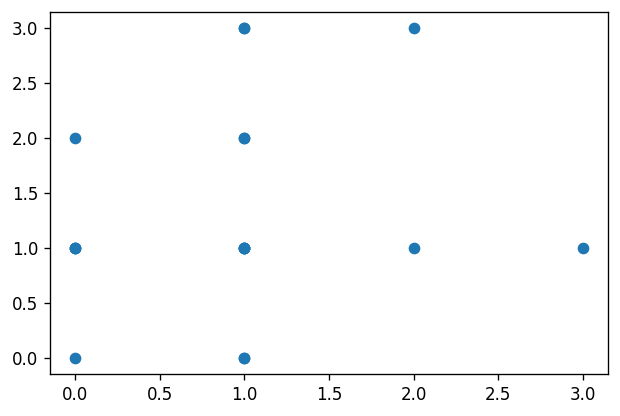

In [136]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df_final['Nº matches winning on half-time away'], df_final['Nº matches winning on half-time at home'])

In [125]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Team                                         18 non-null     object 
 1   Nº turned results after half-time at home    18 non-null     int64  
 2   Nº turned results after half-time away       18 non-null     int64  
 3   Nº turned results after half-time            18 non-null     int64  
 4   Nº advantages kept after half-time away      18 non-null     int64  
 5   Nº advantages kept after half-time at home   18 non-null     int64  
 6   Nº advantages kept after half-time           18 non-null     int64  
 7   % advantages kept after half-time away       18 non-null     float64
 8   % advantages kept after half-time at home    18 non-null     float64
 9   % advantages kept after half-time            18 non-null     float64
 10  % Nº

In [137]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.scatter(df_final['Nº matches winning on half-time away'], df_final['Nº matches winning on half-time at home'],color='white')

for index, row in df_final.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['Nº matches winning on half-time away'], row['Nº matches winning on half-time at home']), frameon=False)
    ax.add_artist(ab)

**Too soon to make conclusions and vizzes**

Text(0.52, 0.17, 'Avg. % Nº matches winning\n   on half-time at home')

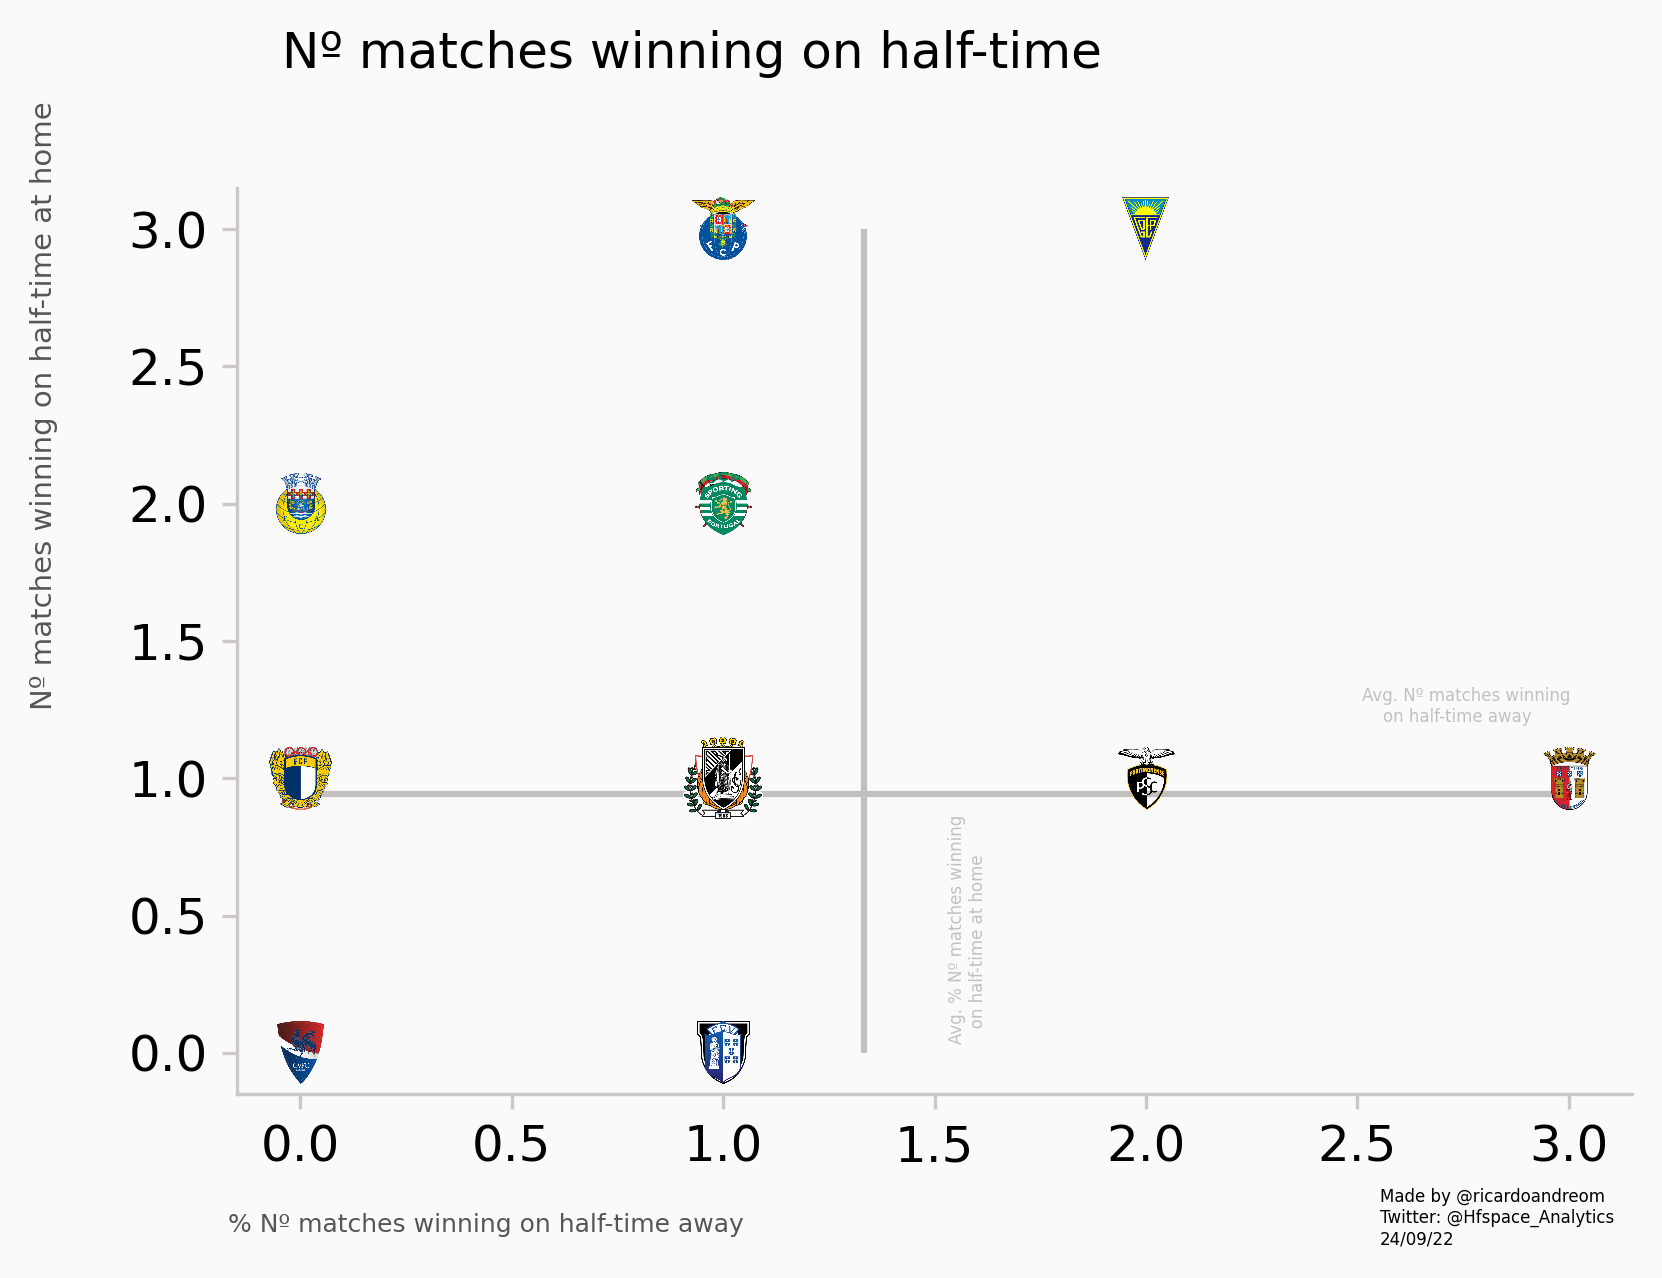

In [156]:
# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df_final['Nº matches winning on half-time away'], df_final['Nº matches winning on half-time at home'],c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df_final.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['Nº matches winning on half-time away'], row['Nº matches winning on half-time at home']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df_final['Nº matches winning on half-time away'].mean(), df_final['Nº matches winning on half-time at home'].min(), df_final['Nº matches winning on half-time at home'].max(), color='#c2c1c0')
plt.vlines(df_final['Nº matches winning on half-time at home'].mean(), df_final['Nº matches winning on half-time away'].min(), df_final['Nº matches winning on half-time away'].max(), color='#c2c1c0')

# Text

## Title & comment
fig.text(.15,.98,'Nº matches winning on half-time',size=12)
#fig.text(.15,.93,'',size=7)
fig.text(.76,0.0,'Made by @ricardoandreom\nTwitter: @Hfspace_Analytics\n24/09/22', size=4)


## Avg line explanation
fig.text(.01,.45,'Nº matches winning on half-time at home', size=7, color='#575654',rotation=90)
fig.text(.12,0.01,'% Nº matches winning on half-time away', size=6, color='#575654')

## Axes titles
fig.text(.75,.435,'Avg. Nº matches winning\n    on half-time away', size=4, color='#c2c1c0')
fig.text(.52,.17,'Avg. % Nº matches winning\n   on half-time at home', size=4, color='#c2c1c0',rotation=90)

## Save plot
plt.savefig('winning_HT.png', dpi=1200, bbox_inches = "tight")